# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

## Regression Model Evaluation

In [6]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [18]:
boston = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)   #load_boston viene de arriba

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
training_boston, testing_boston = train_test_split(boston, test_size=0.2, random_state=25)

print(f"número entreno: {training_boston.shape}")
print(f"número test: {testing_boston.shape}")

número entreno: (404, 13)
número test: (102, 13)


In [33]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
from sklearn.linear_model import LinearRegression


In [36]:
linreg = LinearRegression()

In [37]:
linreg.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [46]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)  #La verdad comparada con la predicción


0.750158126946193

In [61]:
r2_score(y_test, y_pred_test) 

0.6571037340628161

## 4. Calculate and print mean squared error for both the training and the testing set.

In [72]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, y_pred_train)


3.34254936939752

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [73]:
from sklearn.metrics import mean_squared_error as mse

mse(y_train, y_pred_train)

22.096713088342668

## Classification Model Evaluation

In [78]:
from sklearn.datasets import load_iris  #hay que pasarle un average si no dará error

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [74]:
training_load_iris, testing_load_iris = train_test_split(load_iris, test_size=0.2, random_state=25)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [83]:
f_linreg = LinearRegression()

In [87]:
f_linreg.fit(X_train, y_train)

LinearRegression()

In [85]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [111]:
#svc es la máquina de soporte vectorial. Hace la predicción
from sklearn import svm
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

y_pred = svc.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [120]:
#svc es la máquina de soporte vectorial.
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)   #La verdad contra la predicción

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [123]:
from sklearn.metrics import balanced_accuracy_score as bas 

bas(y_test, y_pred)

0.9743589743589745

## 10. Calculate and print the precision score for both the training and the testing set.

In [124]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.9629629629629629

## 11. Calculate and print the recall score for both the training and the testing set.

In [125]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.9743589743589745

## 12. Calculate and print the F1 score for both the training and the testing set.

In [126]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.9670588235294119

## 13. Generate confusion matrices for both the training and the testing set.

In [127]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]])

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

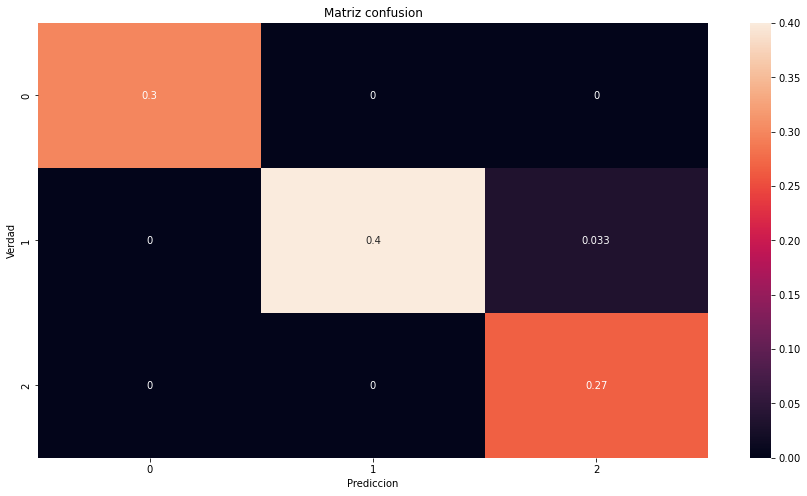

In [129]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.